# Using the Experiment class
This is intended to make it easier to create and manage experiments that use the ϕ calculator. An experiment is a network setup (cm,tpm) and calculation of ϕ for all reachable states.

In [1]:
import phial.experiment as ws
import phial.toolbox  as tb
import phial.node_functions as nf
from phial.experiment import Experiment
from phial.utils import tic,toc
tic() # start tracking time of Notebook load

## Create and run an experiment
Results are returned in a dictionary that includes results for every ϕ calculation (state, phi, calc-time) as well as total time for the experiment.

Saved experiment with results to: /home/pothiers/phial/foo/results_2020-05-14T15:03:42.654439.json
CPU times: user 250 ms, sys: 463 ms, total: 713 ms
Wall time: 553 ms


{'timestamp': '2020-05-14 15:03:42.102130',
 'duration': 0.4587516989558935,
 'results': {'010': {'phi': 0.159722, 'elapsed_seconds': 0.09812786895781755},
  '111': {'phi': 0.375, 'elapsed_seconds': 0.09148258483037353},
  '000': {'phi': 0.125, 'elapsed_seconds': 0.0916353550273925},
  '101': {'phi': 0.340278, 'elapsed_seconds': 0.09104206506162882},
  '001': {'phi': 0.125, 'elapsed_seconds': 0.08559223497286439}},
 'filename': None,
 'uname': uname_result(system='Linux', node='chimp20', release='5.3.0-51-generic', version='#44~18.04.2-Ubuntu SMP Thu Apr 23 14:27:18 UTC 2020', machine='x86_64', processor='x86_64')}

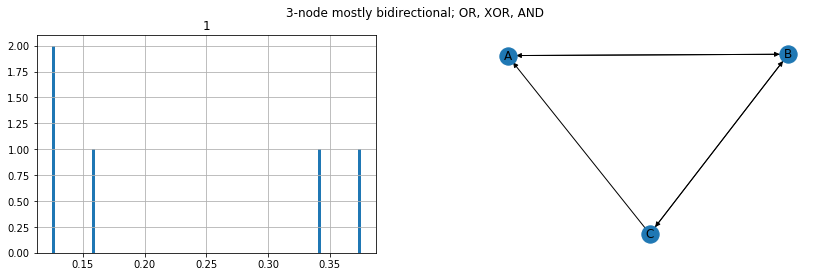

In [4]:
exp = Experiment(
    [('A', 'B'), # ('A', 'C'), 
     ('B', 'A'), ('B', 'C'), 
     ('C', 'A'), ('C', 'B')],
    funcs=dict(A=nf.OR_func, B=nf.AND_func, C=nf.XOR_func),
    saveDir='~/phial/foo',
    title='3-node mostly bidirectional; OR, XOR, AND',  
    comment = 'from pyphi/examples.py',
)
%time exp.run(plot=True)

In [3]:
exp.save()

FileNotFoundError: [Errno 2] No such file or directory: '/home/pothiers/phial/foo/results_2020-05-14T15:03:25.482231.json'

### Plot again, but also include counts of unreachable states in historgram

In [ ]:
exp.analyze(countUnreachable=True)

## Assign node function from list of all possible functions

In [ ]:
gnf = exp.get_num_funcs
gnf

In [ ]:
exp.gen_tpm(dict(A=8, B=12))

In [ ]:
exp.net.get_node('A').func.true_states

In [ ]:
%time exp.run(plot=True,save='funcs_AB')

In [ ]:
exp.gen_tpm(dict(A=0,B=0,C=0)) # node funcs never return 1

In [ ]:
exp.net.get_node('A').func.true_states

In [ ]:
%time exp.run(plot=True)

In [ ]:
exp.net.draw_states()